# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd

C:\Users\jdblu\AppData\Local\Temp\ipykernel_29108\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

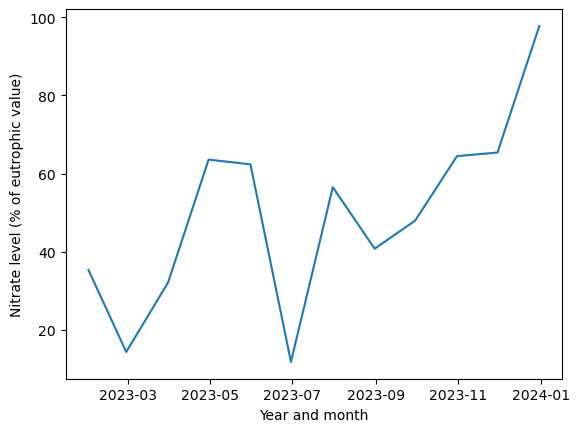

In [6]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\jdblu\AppData\Local\Temp\ipykernel_29108\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

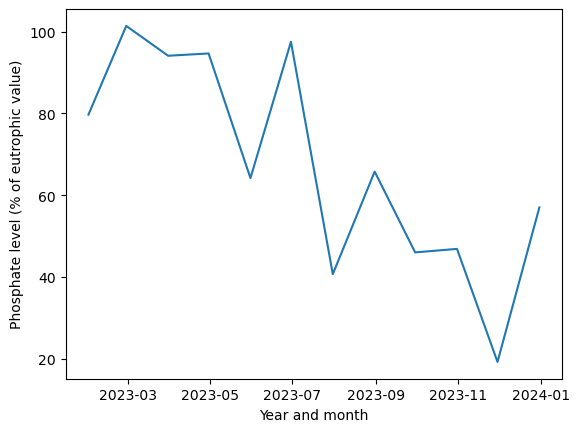

In [7]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

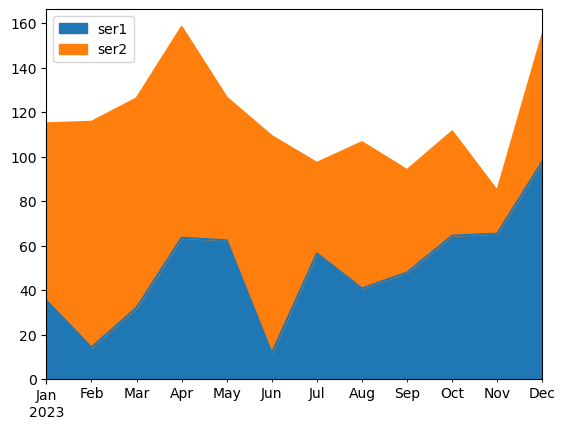

In [8]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

Looking at the above plots, there are few advantages to each plot type.

**Line Graph**

Advantages
- Each graph clearly shows the exact trend and value of a single component (in this case nitrate/phosphate) without interference from the other
- It's easier to compare the individual fluctuations, peaks, and troughs of nitrate versus phosphate when they are distinct lines on the same or separate plots.
- The line graphs avoid implying any combined or additive effect if that is not the purpose of the analysis
Disadvantages

Disadvantages
- Individual line graphs mean there is less emphasis on magnitude and volume. Lines, being thin, don't convey a sense of "volume" or "quantity" as effectively as filled areas
- If there are many data points and lines, the plot can become cluttered, especially if multiple parameters are tracked on a single graph

**Area Plot**

Advantages
- An area plot (especially a stacked area plot) can visually represent the total concentration if nitrate and phosphate contribute to a combined effect. This isn't directly applicable for showing individual concentrations simultaneously but is a general advantage of area plots
- The area plot has an emphasis on magnitude. The filled area can give a stronger visual impression of the magnitude or volume of each component over time or across samples, making changes in quantity more immediately apparent than a thin line

Disadvantages
- It can be harder to read the exact values of each individual component at a specific point in time, especially for the lower series in a stacked plot, as its baseline shifts
- If the trends overlap significantly or one concentration is much higher than the other, an area plot (especially if not stacked) can obscure the data of the lower series.

Overall some changes that we could look to clean up some of these graphs might include adding distinct colors and markers to our line graphs. We might also look to have clear legends and appropriate axis labels. As for the area plot, we might look to make the graph more transparent so that we can easily see areas of overlap. Additioanlly, it still isn't obvious if the area plot needs to be stacked chart. It might be helpful to have some more context. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
def create_correlation_plot(df: pd.DataFrame, title: str = "Correlation Matrix", figsize: tuple = (10, 8), annot: bool = True, cmap: str = "coolwarm", fmt: str = ".2f"):
    # Select only numerical columns for correlation calculation
    df_numeric = df.select_dtypes(include=np.number)

    # Calculate the correlation matrix
    correlation_matrix = df_numeric.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Create the heatmap
    # annot=True displays the correlation values on the heatmap
    # cmap defines the color map (e.g., 'coolwarm' for diverging colors)
    # fmt specifies the format of the annotation values
    # linewidths and linecolor add lines between cells for better separation
    sns.heatmap(correlation_matrix,
                annot=annot,
                cmap=cmap,
                fmt=fmt,
                linewidths=.5,
                linecolor='black',
                cbar_kws={'label': 'Correlation Coefficient'})

    # Set the title of the plot
    plt.title(title, fontsize=16)
    plt.tight_layout()

    # Return the current axes for further manipulation if needed
    return plt.gca()

In [13]:
def scatter_two_columns(df, col_x, col_y, title=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col_x], df[col_y], alpha=0.7, edgecolor='k')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(title if title else f"Scatter Plot: {col_x} vs {col_y}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [14]:
def pairplot_selected_columns(df, columns=None, hue=None, diag_kind='auto', kind='scatter'):
    # Use only specified columns or default to all numeric ones
    if columns is None:
        data = df.select_dtypes(include='number')
    else:
        missing = [col for col in columns if col not in df.columns]
        if missing:
            raise ValueError(f"The following columns are not in the DataFrame: {missing}")
        data = df[columns]

    # Create the pairplot
    sns.pairplot(data, hue=hue, diag_kind=diag_kind, kind=kind)
    plt.show()

In [15]:
def plot_time_series(df, time_col, value_cols=None, kind='line', title=None):
    """
    Plots line or area chart(s) for given time and value columns.

    Parameters:
    - df: pandas DataFrame
    - time_col: str, name of the column with datetime/time values
    - value_cols: list of str, numeric columns to plot; if None, all numeric columns are used
    - kind: str, 'line' or 'area'
    - title: str, optional plot title
    """
    if time_col not in df.columns:
        raise ValueError(f"'{time_col}' column not found in DataFrame")

    # Ensure the time column is datetime
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])

    # Set time as index
    df.set_index(time_col, inplace=True)

    # Choose numeric columns
    if value_cols is None:
        value_cols = df.select_dtypes(include='number').columns.tolist()
    else:
        missing = [col for col in value_cols if col not in df.columns]
        if missing:
            raise ValueError(f"The following value columns are not in the DataFrame: {missing}")

    # Subset to only time and value columns
    df_plot = df[value_cols]

    # Plotting
    plt.figure(figsize=(12, 6))
    if kind == 'line':
        df_plot.plot(ax=plt.gca())
    elif kind == 'area':
        df_plot.plot.area(ax=plt.gca(), alpha=0.6)
    else:
        raise ValueError("`kind` must be either 'line' or 'area'")

    plt.title(title or f"{kind.title()} Plot of {', '.join(value_cols)} over Time")
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
def grouped_hist(df, measure_col, group_col, bins):
    groups = df[group_col].unique()
    figsize=(8, 5)
    for group in groups:
        subset = df[df[group_col] == group][measure_col].dropna()
        sns.histplot(subset, bins=bins, label=str(group), kde=False, alpha=0.5)
    
    plt.xlabel(measure_col)
    plt.ylabel("Count")
    plt.title(f"Grouped Histogram of {measure_col} by {group_col}")
    plt.legend(title=group_col)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [17]:
# Credit Card Fraud Data
CreditCardFraud = pd.read_csv("CreditCardFraudCleaned.csv")

# Credit Card Approval Dataset
CreditCardApproval = pd.read_csv("CreditCardApprovalCleaned.csv")

# Loan Default Prediction
LoanDefaultPrediction = pd.read_csv("LoanDefaultPredictionClean.csv")

## Credit Card Fraud Data

Let's start by taking a look at our credit card fraud dataset

In [20]:
CreditCardFraud.iloc[:, :23].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [21]:
CreditCardFraud = CreditCardFraud.iloc[:, :23]

In [22]:
CreditCardFraud['trans_date_trans_time'] = pd.to_datetime(CreditCardFraud['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
CreditCardFraud['trans_hour'] = CreditCardFraud['trans_date_trans_time'].dt.hour

<Axes: title={'center': 'Correlation Matrix'}>

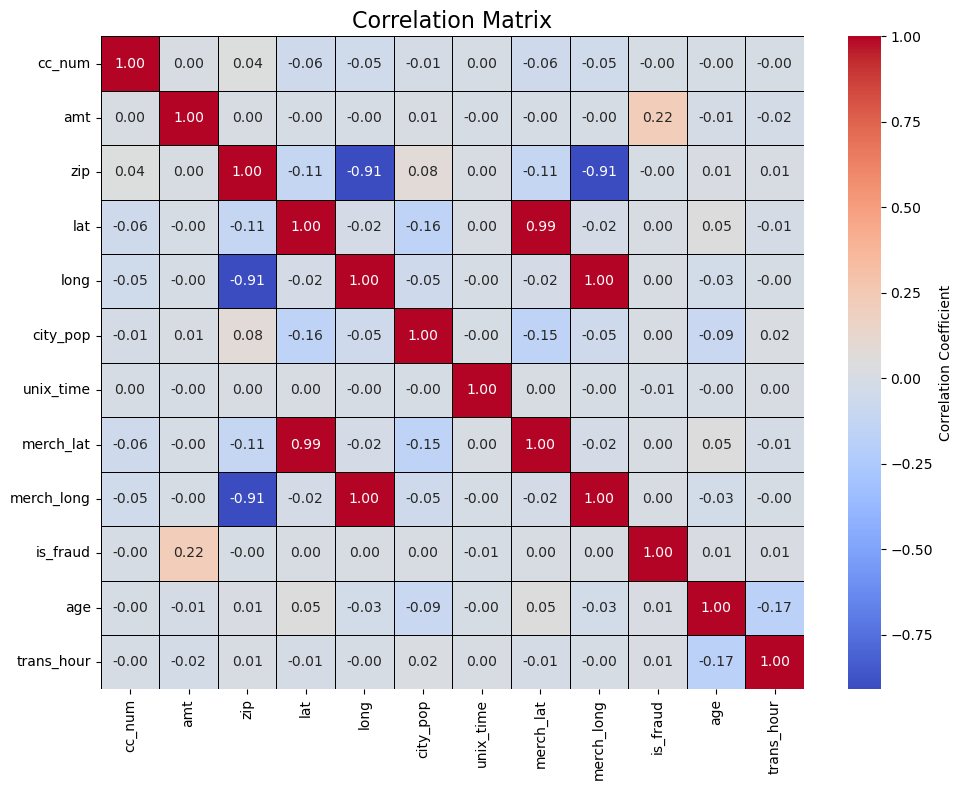

In [23]:
create_correlation_plot(CreditCardFraud)

Building our correlation matrix, we can actaully see that the vast majority of our numerical variables are not strongly correlated with one another except for a few datapoints. We do have a couple that are highly correalted (specifically or merchant lat/long and our purchase lat and long columns). We will dive into these columns further down in our analysis but at first glance, they are most likely redundant data points.

For now let's check out the main relationship that is catching my eye, amt vs is_fraud.

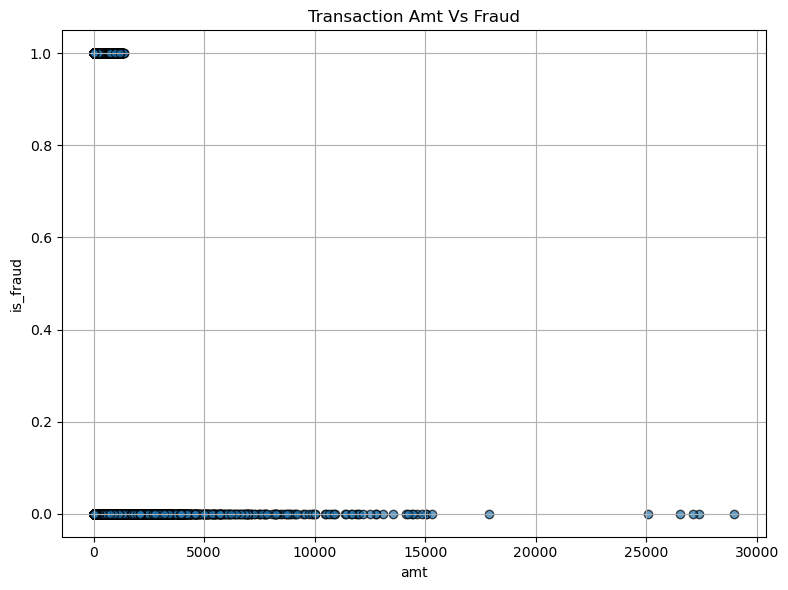

In [25]:
scatter_two_columns(CreditCardFraud, 'amt', 'is_fraud', title='Transaction Amt Vs Fraud')

While this might not be the most intuitive graph, what this does tell us is that our fraudulent transactions tend to be lower in transaction amounts relative to some of our other values in the dataset. This could possibly be fraudsters trying to spend amounts under certain thresholds that might trigger security warnings.

Earlier we had mentioned that the majority of our variables were not strongly correalted. Lets take a look at ond of those relationships.

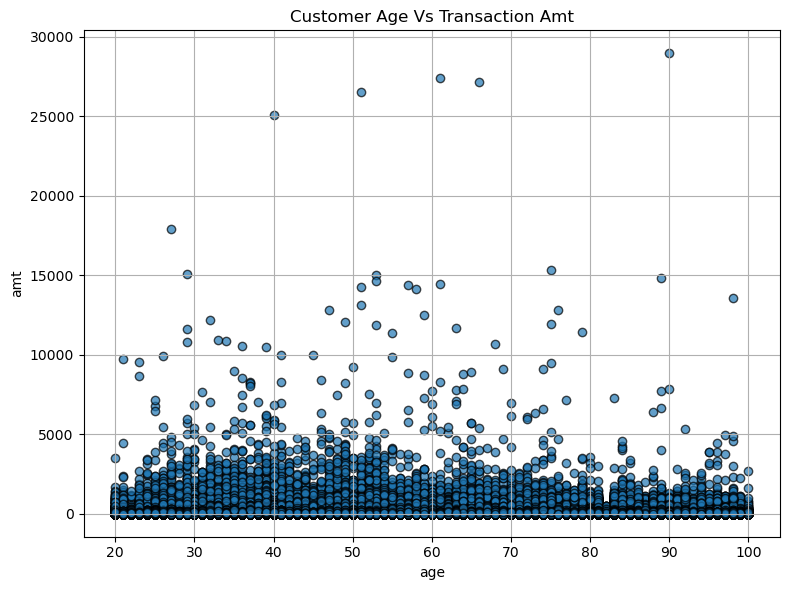

In [27]:
scatter_two_columns(CreditCardFraud, 'age', 'amt', title='Customer Age Vs Transaction Amt')

Looking at the above graph we can see taht there does appear to be any particularly obvious relationship between our variables. Just a pretty random scatter plot.

Earlier I had mentioned that among our variables our latitude and longitude variables were highly correlated. The reason for this is that for the vast majority of purchases, the customer purchase location is the same as the merchant location. As a result we can a straight linear relationship between the two values. These are essentially redudant variables.

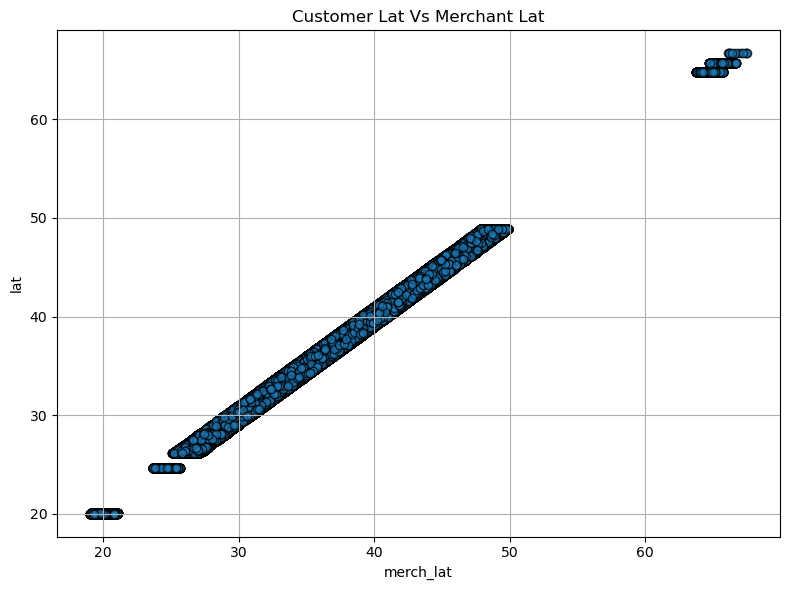

In [30]:
scatter_two_columns(CreditCardFraud, 'merch_lat', 'lat', title='Customer Lat Vs Merchant Lat')

Next let's do a pairplot of our lat and long variables...

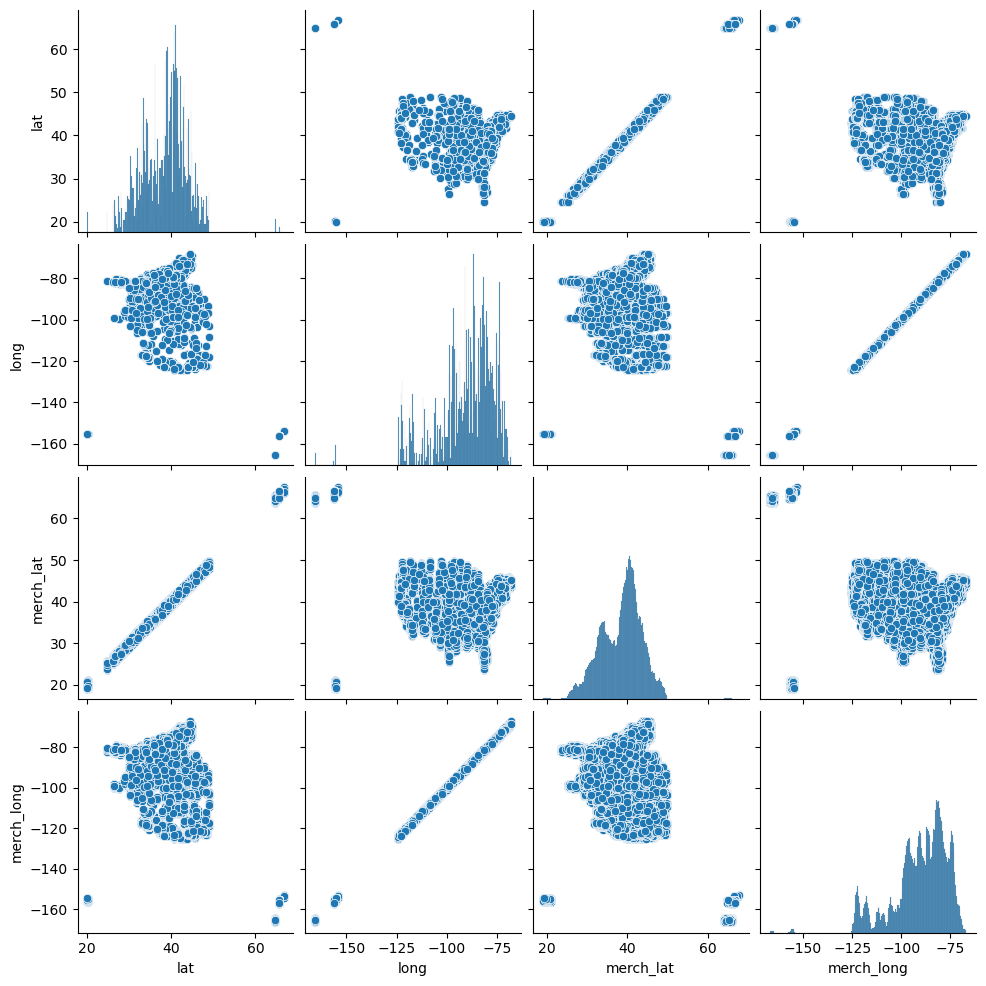

In [32]:
pairplot_selected_columns(CreditCardFraud, columns=['lat', 'long', 'merch_lat', 'merch_long'])

While not the most useful, if we look at the plot of our lat vs long we can see somehting pretty intersting... It's a rough map of the United States! While this is not important for our analysis, it is definitely a fun way of visualizing the data and could be used for potential feature extraction down the road.

Lastly, we do have a time variable in our dataset. While not the most valuable in terms of insights, lets plot it with our amt spent variable to see if we can find anything interesting.

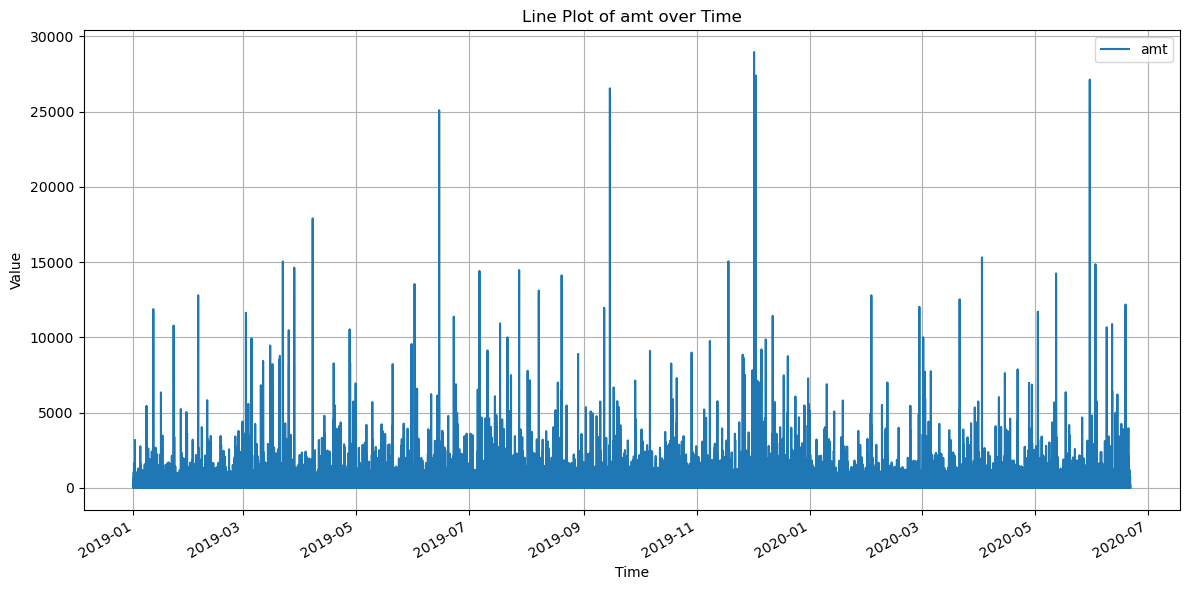

In [34]:
plot_time_series(CreditCardFraud, time_col='trans_date_trans_time', value_cols=['amt'], kind='line')

While not the most interesting, Soemthing to note is that we see a large spike in purchases around december which would coincide with holiday shopping in the united states.

### Conclusion

In conclusion, our analysis indicates no strong correlations between the variables in this dataset, with the exception of the redundant longitude and latitude fields (customer vs. merchant). Based on the available evidence, there's nothing to disqualify this dataset from further use.

## Credit Card Approval Data

Next let's look at our credit card approval dataset.

In [39]:
CreditCardApproval.sample(n=5)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
16526,5100019,M,1,1,0,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,1,0,0,0,0,1,0,0,0,0
11464,5068111,F,0,1,0,450000,State servant ...,Higher education ...,Single / not married ...,House / apartment ...,...,0,0,1,0,0,1,0,0,0,0
10943,5067107,M,0,1,0,225000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,1,0,0,0,0,1,0,0,0,0
8657,5053755,F,0,1,1,135000,Commercial associate ...,Higher education ...,Married ...,House / apartment ...,...,1,0,0,0,0,1,0,0,0,0
21257,5126306,F,0,0,0,121500,Working ...,Higher education ...,Married ...,House / apartment ...,...,1,0,0,0,0,1,0,0,0,0


In [40]:
CreditCardApproval.iloc[:, :21].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [41]:
CreditCardApproval = CreditCardApproval.iloc[:, :21]

<Axes: title={'center': 'Correlation Matrix'}>

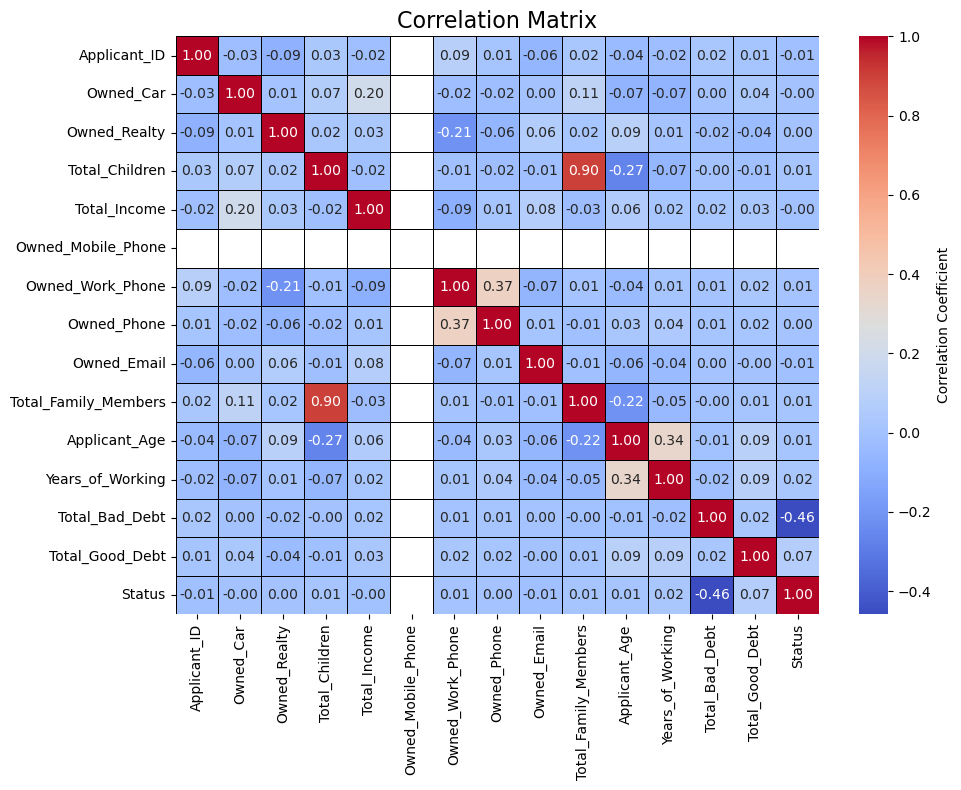

In [42]:
create_correlation_plot(CreditCardApproval)

Analyzing our correlation plot above, there are a few intersting results that we might want to examine further. First, total family members appears to have a high correlation with number or children (this is most likely redundant data which we will cover furth in the document). Additionally, fields such as total bad debt appear to have a moderate, negative correlation with whether a customer was approved for their credit card. Additionally, our applicant age column appears to have some lighter correlations with columns total children, total family members, and years working (again these have some obvious similarities that we will explore later).

Let's dive into some more graphs

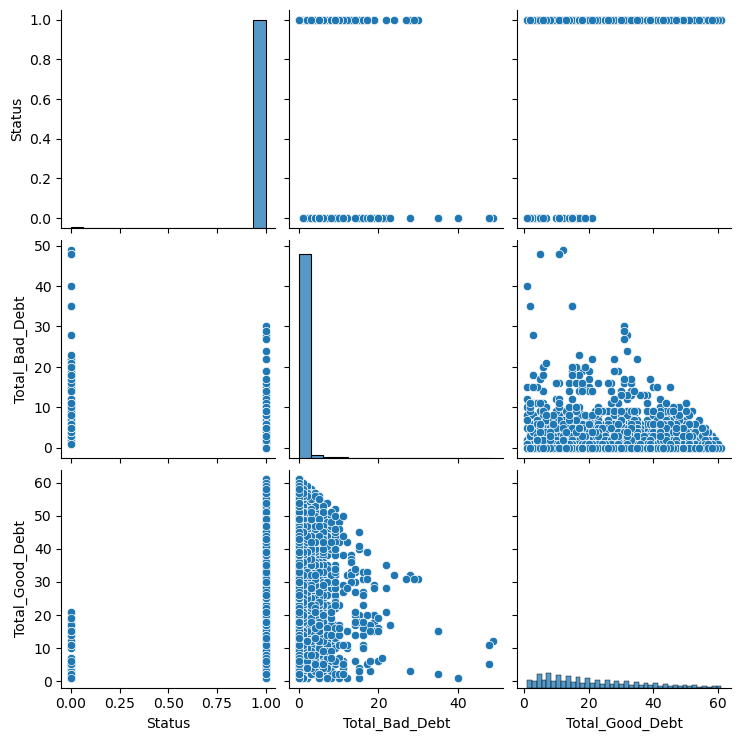

In [44]:
pairplot_selected_columns(CreditCardApproval, columns=['Status', 'Total_Bad_Debt', 'Total_Good_Debt',])

Similar to our graph from the last dataset, comparing numeric columns to binary ones can be a little funky. However if we examine our debts against status we can somewhat start to get an idea of how they could be related. Customers with lots of good debt (20+) are almost always approved for their credit card, while those wiht bad debt appear to have mixed results.

Earlier we saw that our age and famiy demographic charts appeared to have some correlation, let's explore these values now.

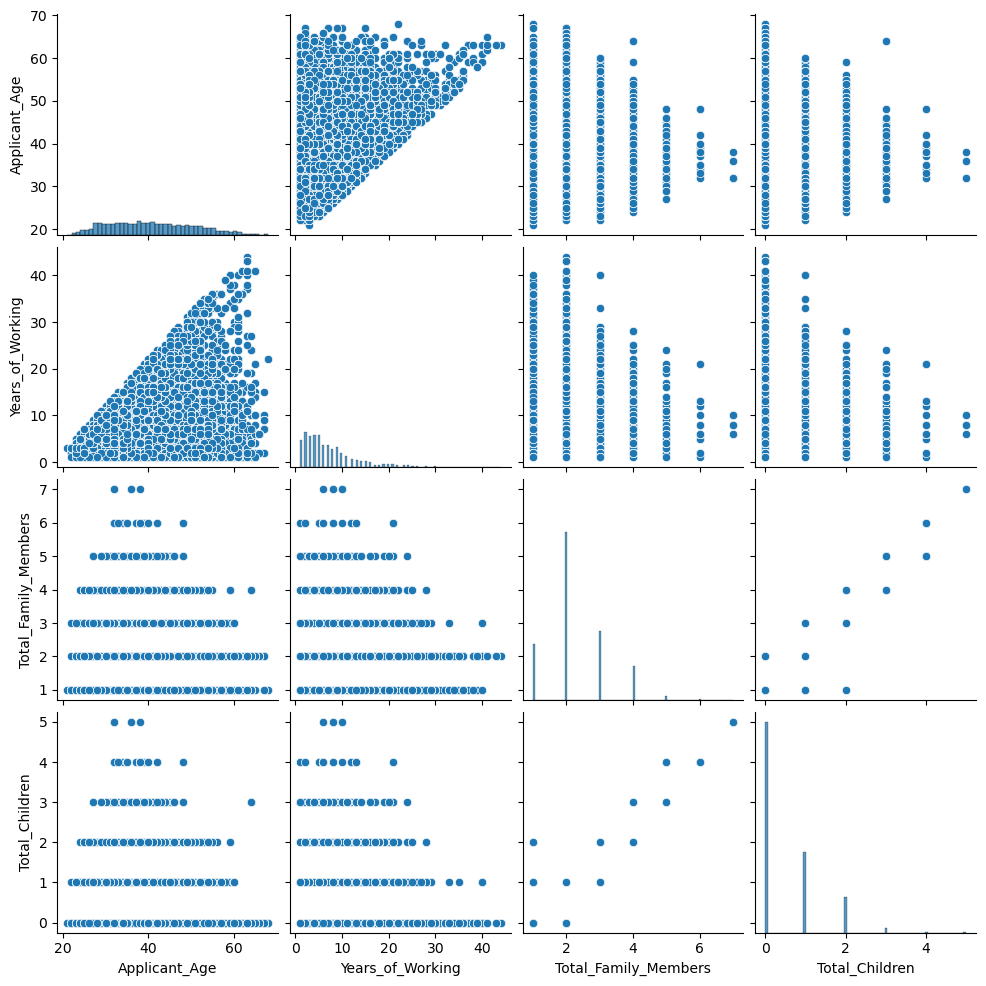

In [46]:
pairplot_selected_columns(CreditCardApproval, columns=['Applicant_Age', 'Years_of_Working', 'Total_Family_Members', 'Total_Children'])

Looking at some of the above graphs, we can start to put together a pretty clear picture of what is going on. As family members increase, so does applicants number of children. Additionally, as an applicants age increases, so does their years of working experience. These values are all conveying somewhat similar information and therefore have the potential to be redudant. When moving onto modeling, we might look remove some of these variables where it makes sense.

For our last graph, let's look at one of the other variables that had a small degree of correlation

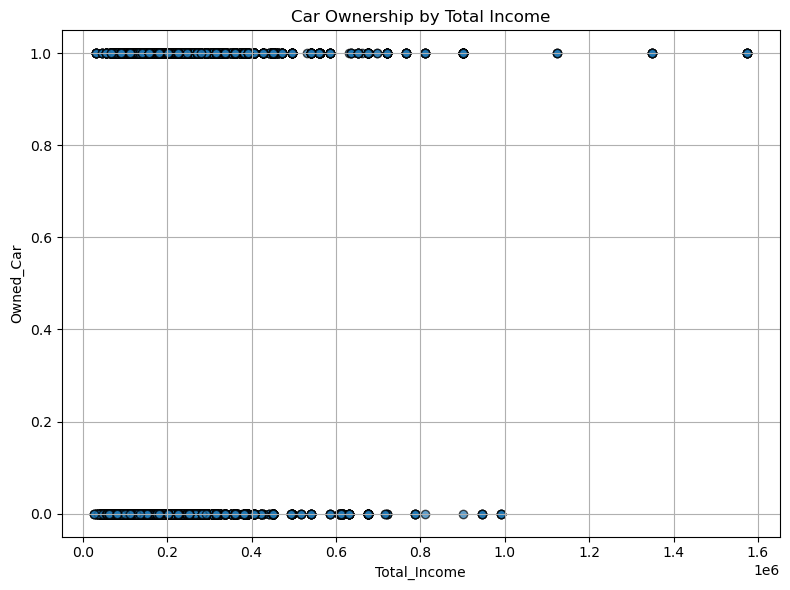

In [49]:
scatter_two_columns(CreditCardApproval, 'Total_Income', 'Owned_Car', title='Car Ownership by Total Income')

This is not too surprisng as folks with higher income most likely have the ability to purchase things like cars.

### Conclusion

Based on our analysis, most columns in this credit card approval dataset don't show a high degree of correlation. The main exceptions are those related to family demographics and applicant ages. We'll likely remove a couple of these highly correlated columns during the modeling phase, but this shouldn't be grounds disqualify the dataset from being used.

## Loan Default Data

Moving on to our last dataset, lets take a look at our loan default dataset.

In [54]:
LoanDefaultPrediction.iloc[:, :30].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        87500 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          87500 non-null  object 
 10  Debt_to_Income       87500 non-null  float64
 11  Postal_Code          87500 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [55]:
LoanDefaultPrediction = LoanDefaultPrediction.iloc[:, :30]

In [56]:
LoanDefaultPrediction.sample(n=5)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
52529,89799,2657767,II,>10yrs,Source Verified,54560.0,MORTGAGE,0,0,Insurance Agent / Underwriter,...,fully paid,MO,8,42828.0,3 years,29556.494524,credit card,I,0.0,0
77440,40988,1001686,IV,8yrs,Source Verified,97152.0,RENT,0,0,Non Commissioned Officer,...,fully paid,CA,7,10126.0,3 years,6448.410000,other,I,0.0,1
10822,117907,701161,II,2yrs,Vfied,116688.0,MORTGAGE,0,0,Dart Neuroscience LLC,...,fully paid,CA,15,107568.0,3 years,29556.494524,debt consolidation,I,0.0,1
67773,115111,4998544,VI,>10yrs,Source Verified,91520.0,RENT,0,0,Maintenance Supervisor,...,whole,IL,6,8134.0,5 years,6747.660000,other,I,0.0,0
43688,53832,4546178,V,>10yrs,Not Vfied,117920.0,MORTGAGE,0,0,rn,...,whole,VT,9,9462.0,5 years,5745.600000,debt consolidation,I,0.0,0


<Axes: title={'center': 'Correlation Matrix'}>

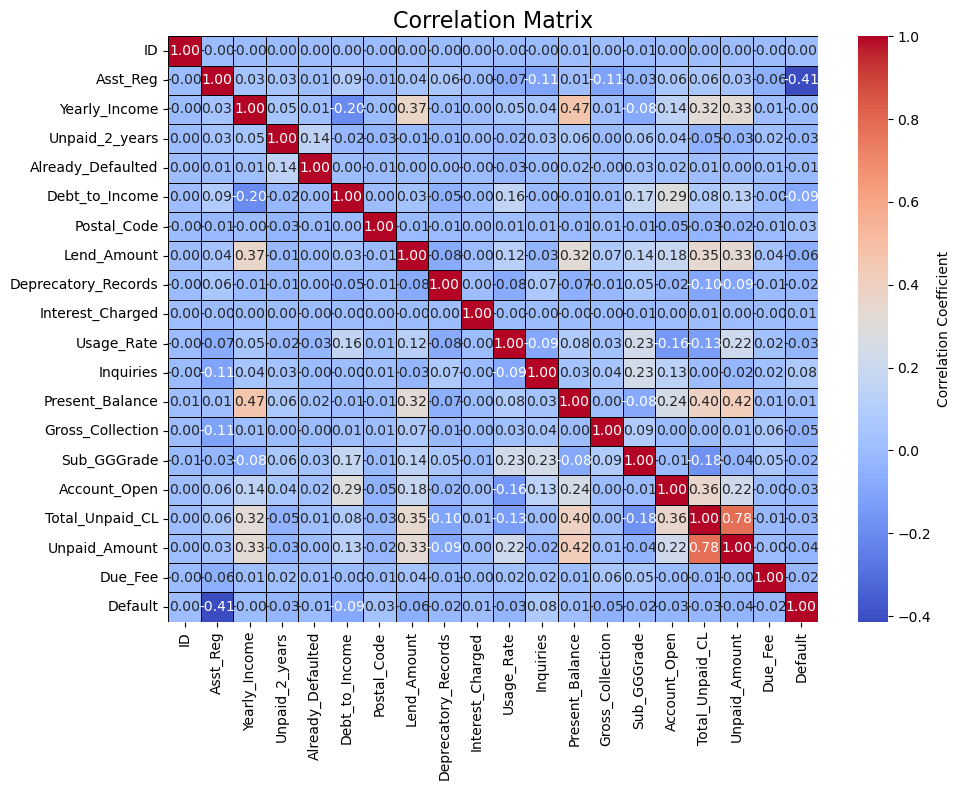

In [57]:
create_correlation_plot(LoanDefaultPrediction)

Compared to our previous datasets, we have a lot more numerical columns, a few of which appear to have some correlation. Taking a look at the graph, the immediate columns that stick out are the Unpaid_Amount (Unpaid balance on the credit card) Vs Total_Unpaid_CL (Unpaid balance across all loans). As with similar cases, these are most likely displaying very similar information. We will look at these further down in the document.


In addition, there are a few other columns that are pretty interesting, specifically Asst_Reg (Value of all the assets registered under the borrowers name) and the default status variable which appears to have modderate, negative correlated. 

Lastly, we have a few fields, 'Yearly_Income', 'Lend_Amount', 'Present_Balance', 'Unpaid_Amount' whcih all appear to have some moderate correaltion (0.3-0.5). We will plan to look at these as well further in the document.

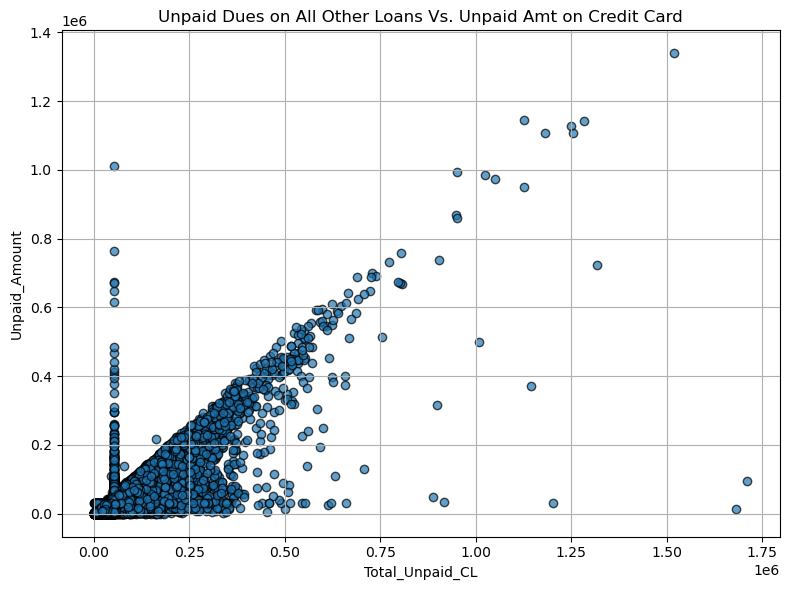

In [59]:
scatter_two_columns(LoanDefaultPrediction, 'Total_Unpaid_CL', 'Unpaid_Amount', title='Unpaid Dues on All Other Loans Vs. Unpaid Amt on Credit Card')

Looking at our highest correlated variable (Unpaid balance on the credit card) Vs Total_Unpaid_CL (Unpaid balance across all loans), we can see that as their total unpaid balance across all loans increases, so does their owed amount on the credit card. This suggests that folks with larger outstanding debts also use their credit card quite a bit. This appears to be somewhat redudnant but because they are technically looking at two different sets of debt, we might look to investigate this further in the modeling phase.

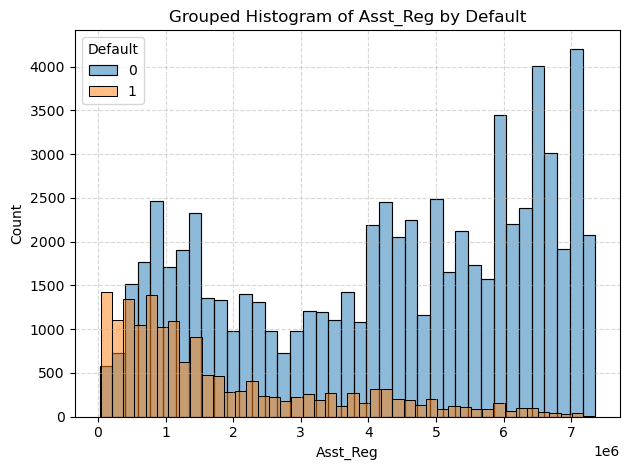

In [61]:
grouped_hist(LoanDefaultPrediction, 'Asst_Reg', 'Default', 'auto')

looking at our asst_reg vs default plot (which had a negative correatlion) we can see that in general, as assets held go up, the amount of folks that default clearly appear to drop off. This is not too surprising however as having more money on hand probably means you can pay off your credit card bill.

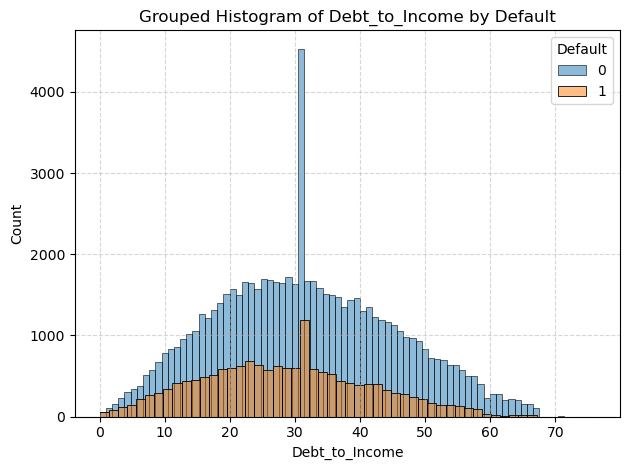

In [63]:
grouped_hist(LoanDefaultPrediction[LoanDefaultPrediction['Debt_to_Income'] < 100], 'Debt_to_Income', 'Default', 'auto')

These variables only had a slight negative correlation but I thought I would revist this plot from last week. Interestingly enough it does appear that defaults are' not particularly related to your debit to income ratio. Default appears to scale somewhat evenly.

Earlier in our initial graph, we had seen that some of our amount based columns appear to have some moderate correlation. Lets build a pair plot to visualize this.

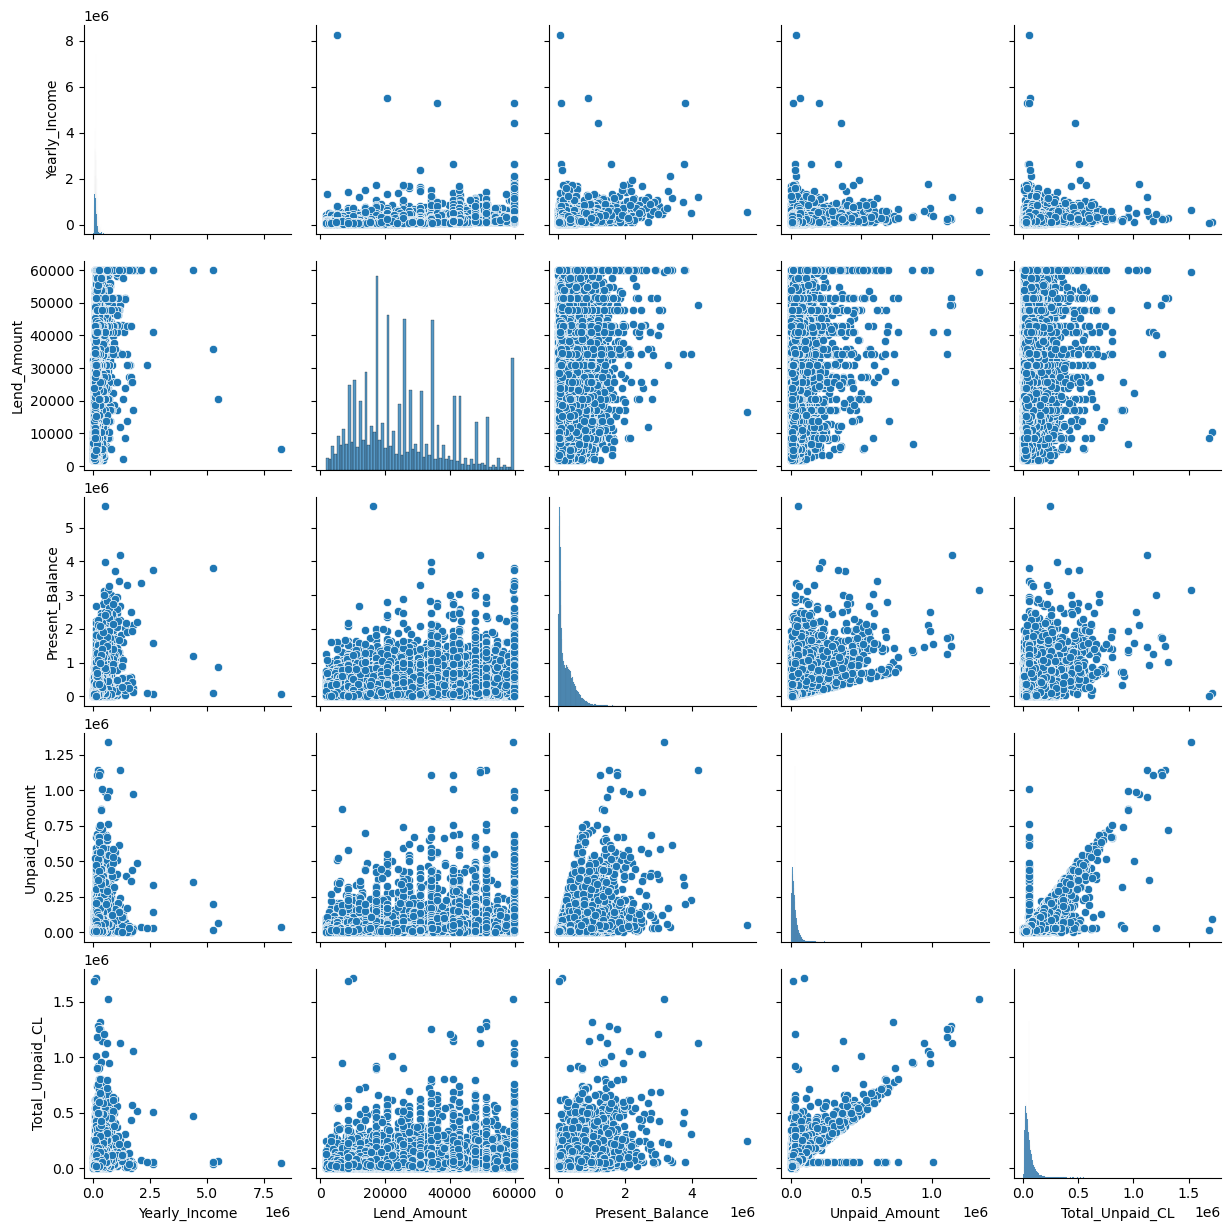

In [66]:
pairplot_selected_columns(LoanDefaultPrediction, columns=['Yearly_Income', 'Lend_Amount', 'Present_Balance', 'Unpaid_Amount', 'Total_Unpaid_CL'])

Looking at the above graphs, I think the most intersting is our present balance vs unpaid amount. What we are seeing here looks very similar to the concept of heteroscedasticity which manifests as a "fanning out" or cone-shaped pattern, suggestiong that while there is a general upward trend, the variance is not constant.

Lastly let's create a pair plot for some of our other columns which could possibly be interesting.

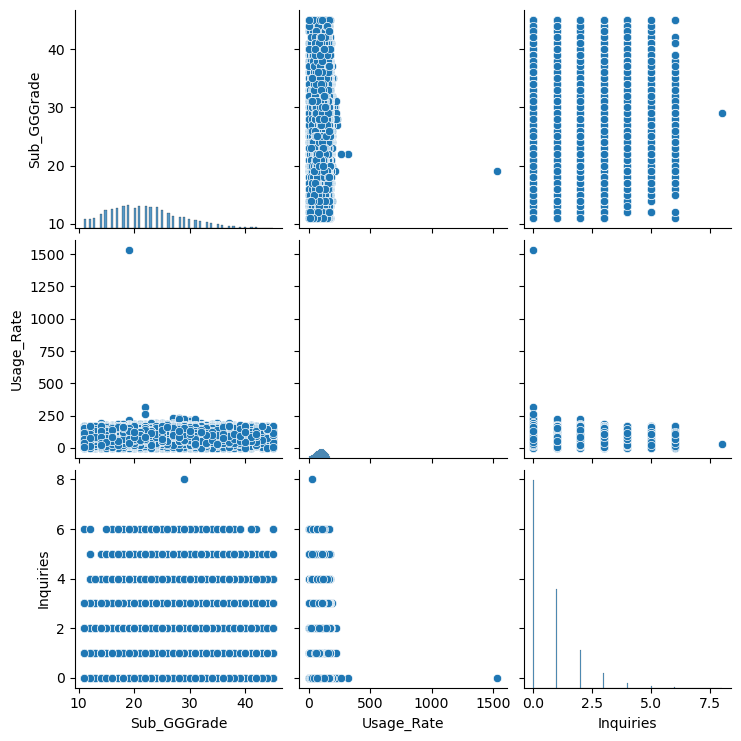

In [69]:
pairplot_selected_columns(LoanDefaultPrediction, columns=['Sub_GGGrade', 'Usage_Rate', 'Inquiries'])

Interstingly in this graph, we can see that one customer with an icnredbily high usage rate is cuasing the graph to extend in it's respective axis direction. In addition to this, while not super clear, it does seem like usage rate decreases as inqueries increase, however there does not appear to be a strong relationship and can be chalked up to random variance.

Compared to our other datasets, he credit card default dataset exhibits a higher number of columns with moderate correlations. The most notable concern is the strong relationship between Total_Unpaid_CL and Unpaid_Amount, suggesting potential redundancy. It might make sense to alert the Total_Unpaid_CL variable later down the line (such as normalization) so that they are not so highly correlated. Outside of this however the dataset remains suitable for modeling.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

for this weeks data plot, I will be tackling figure 3.23 on page 97 of the book.

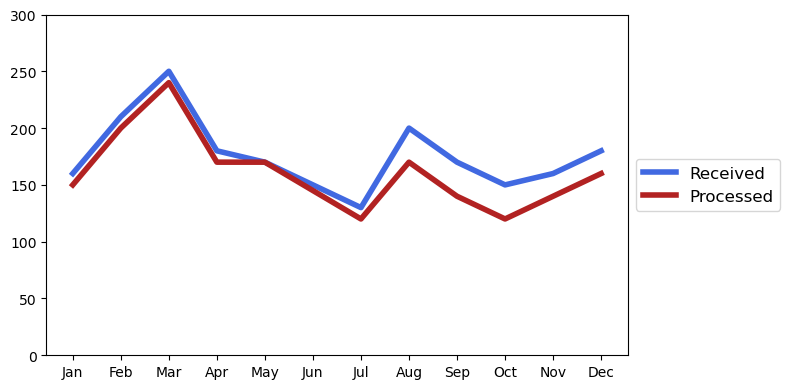

In [74]:
import matplotlib.pyplot as plt

#sample data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [160, 210, 250, 180, 170, 150, 130, 200, 170, 150, 160, 180]
processed = [150, 200, 240, 170, 170, 145, 120, 170, 140, 120, 140, 160]


plt.figure(figsize=(8, 4))
plt.plot(months, received, label='Received', color='royalblue', linewidth=4)
plt.plot(months, processed, label='Processed', color='firebrick', linewidth=4)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.ylim(0, 300)
plt.tight_layout()
plt.show()